Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [80]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    
enrollments[0]


{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [81]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

def get_recs(filename):
    with open(filename, 'rb') as f:
        f_reader = unicodecsv.DictReader(f)
        f_list = list(f_reader)
        return f_list
    
daily_engagement = get_recs('daily_engagement.csv')
project_submissions = get_recs('project_submissions.csv')

print daily_engagement[0],"\n"
print project_submissions[0],"\n"
print enrollments[0],"\n"

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'} 

{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'} 

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'} 



## Fixing Data Types

In [82]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [83]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [84]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [85]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
def table_summary(table):
    '''Using sets instead of checking list. Returns set of student ids and row count of table'''
    num_rows = len(table)
    student_ids = set()
    for rec in table:
        if 'account_key' in rec:
            id = rec['account_key']
        elif 'acct' in rec:
            id = rec['acct']
        student_ids.add(id)
    return {'row_ct': num_rows, 'students': student_ids}

# NOTE THAT WE"LL WANT THESE LATER TO COMPARE SETS
enrollment_summary = table_summary(enrollments)
engagement_summary = table_summary(daily_engagement)
project_summary = table_summary(project_submissions)

for summary in [enrollment_summary, engagement_summary, project_summary]:
    print "Row count: %d, Student count: %d" % (summary['row_ct'], len(summary['students']))

Row count: 1640, Student count: 1302
Row count: 136240, Student count: 1237
Row count: 3642, Student count: 743


## Problems in the Data

In [86]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
def key_rename(table, names):
    '''Rename the "acct" column in the daily_engagement table to "account_key"'''
    for rec in table:
        old_name = names['old']
        new_name = names['new']
        if old_name in rec:
            rec[new_name] = rec.pop(old_name)

key_rename(daily_engagement, {'old':'acct', 'new':'account_key'})
daily_engagement[0]['account_key']

u'0'

## Missing Engagement Records

In [87]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
enrolled_students = enrollment_summary['students']
engaged_students = engagement_summary['students']
missing_students = [x for x in enrolled_students if x not in engaged_students]

for enrollment in enrollments:
    if enrollment['account_key'] == missing_students[0]:
        print enrollment

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 4, 4, 0, 0), u'account_key': u'1145', u'cancel_date': datetime.datetime(2015, 4, 4, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [88]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
for enrollment in enrollments:
    if enrollment['account_key'] in missing_students:
        if enrollment['days_to_cancel'] > 0 or not enrollment['is_canceled']:
            print enrollment
        

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


## Tracking Down the Remaining Problems

In [89]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [90]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [91]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [92]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.
def find_paid_students():
    paid_students = {}
    for student in non_udacity_enrollments:
        if not student['is_canceled'] or student['days_to_cancel'] > 7:
            account_key = student['account_key'] 
            start_date = student['join_date']
            if account_key not in paid_students or start_date > paid_students[account_key]:
                paid_students[account_key] = start_date
    return paid_students

paid_students = find_paid_students()
len(paid_students)


995

## Getting Data from First Week

In [93]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [94]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

def find_first_week_engagement(paid_students):
    engagement_list = []
    for student in paid_students:
        join_date = paid_students[student]
        for engagement in non_udacity_engagement:
            if student == engagement['account_key']:
                if within_one_week(join_date, engagement['utc_date']):
                    engagement_list.append(engagement)
    return engagement_list
            
paid_engagement_in_first_week = find_first_week_engagement(paid_students)
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [95]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

for engagement in engagement_by_account['108']:
    print engagement

{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 25.9137858334, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 20, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 3.40682316667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 21, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 99.1186611667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 22, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 35.8316206667, u'projects_completed': 2, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 23, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 24, 0, 0)}
{u'lessons_completed': 0, u'num_courses_

In [96]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [97]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
for account in total_minutes_by_account:
    if total_minutes_by_account[account] > 10000:
        print account
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [98]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

## Lessons Completed in First Week

In [99]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
##
## 'engagement_by_account' contains all of the engagements in a week for one student
##
## The 'lessons_completed' key contains the number of lessons completed on the specific day 
## the engagement record was created. These will need to be summed into a 'total_lessons_per_student'
## value.
## 
## Other variables to look at are:
## 'num_courses_visited', 'total_minutes_visited', 'projects_completed'

def totals_by_variable(engagement_by_account, variable):
    var_total_by_account = {}
    for student, engagement_recs in engagement_by_account.items():
        var_total = 0
        for record in engagement_recs:
            var_total += record[variable]
        var_total_by_account[student] = var_total
    return var_total_by_account
        
def stats_per_totals(totals_dictionary):
    totals = totals_dictionary.values()
    summary = {}
    summary['mean'] = np.mean(totals)
    summary['std_dev'] = np.std(totals)
    summary['min'] = np.min(totals)
    summary['max'] = np.max(totals)
    return summary
        
lessons_completed_summary = totals_by_variable(engagement_by_account, 'lessons_completed')
lessons_completed_stats = stats_per_totals(lessons_completed_summary)
print "lessons_completed_stats\n", lessons_completed_stats

projects_completed_summary = totals_by_variable(engagement_by_account, 'projects_completed')
projects_completed_stats = stats_per_totals(projects_completed_summary)
print "projects_completed_stats\n", projects_completed_stats

num_courses_visited_summary = totals_by_variable(engagement_by_account, 'num_courses_visited')
num_courses_visited_stats = stats_per_totals(num_courses_visited_summary)
print "num_courses_visited_stats\n", num_courses_visited_stats

total_minutes_visited_summary = totals_by_variable(engagement_by_account, 'total_minutes_visited')
total_minutes_visited_stats = stats_per_totals(total_minutes_visited_summary)
print "total_minutes_visited_stats\n", total_minutes_visited_stats


lessons_completed_stats
{'max': 36, 'min': 0, 'std_dev': 3.0025612998294231, 'mean': 1.636180904522613}
projects_completed_stats
{'max': 2, 'min': 0, 'std_dev': 0.089464173203086958, 'mean': 0.006030150753768844}
num_courses_visited_stats
{'max': 25, 'min': 0, 'std_dev': 3.5912451871028028, 'mean': 3.9788944723618092}
total_minutes_visited_stats
{'max': 3564.7332644989997, 'min': 0.0, 'std_dev': 412.99693340852957, 'mean': 306.70832675342825}


## Number of Visits in First Week

In [100]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

def create_has_visited(engagement_by_account):
    '''Adds a has_visited field and sets it to 1 if the student visits at least 1 class'''
    for account_key, engagement_for_student in engagement_by_account.items():
        for engagement_record in engagement_for_student:
            if engagement_record['num_courses_visited'] > 0:
                engagement_record['has_visited'] = 1
            else:
                engagement_record['has_visited'] = 0
    return engagement_by_account

create_has_visited(engagement_by_account)

has_visited_summary = totals_by_variable(engagement_by_account, 'has_visited')
has_visited_stats = stats_per_totals(has_visited_summary)
print "has_visited_stats\n", has_visited_stats

has_visited_stats
{'max': 7, 'min': 0, 'std_dev': 2.2551980029196814, 'mean': 2.8673366834170855}


## Splitting out Passing Students

In [101]:
######################################
#                 11                 #
######################################

subway_project_lesson_keys = ['746169184', '3176718735']
passing_grades = ['PASSED', 'DISTINCTION']

## Create a set of students that completed the subway project and got a PASSED or DISTINGUISHED grade
passing_students = set()

for record in non_udacity_submissions:
    if record['lesson_key'] in subway_project_lesson_keys and record['assigned_rating'] in passing_grades:
                  passing_students.add(record['account_key'])
            
print len(passing_students), "passing students"

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
passing_engagement = []
non_passing_engagement = []

for student_key, engagement_list in engagement_by_account.items():
    for engagement in engagement_list:
        if student_key in passing_students:
            passing_engagement.append(engagement)
        else:
            non_passing_engagement.append(engagement)

print len(passing_engagement)
print len(non_passing_engagement)

651 passing students
4527
2392


## Comparing the Two Student Groups

In [102]:
######################################
#                 12                 #
######################################

def create_engagement_by_student(engagement_list):
    '''Takes in a list of engagements and groups them by account_key
    Returns a dictionary with {account_key: [list of engagements]}'''
    engagement_by_student = defaultdict(list)
    for engagement_record in engagement_list:
        account_key = engagement_record['account_key']
        engagement_by_student[account_key].append(engagement_record)
    return engagement_by_student

passing_engagement_by_account = create_engagement_by_student(passing_engagement)
non_passing_engagement_by_account = create_engagement_by_student(non_passing_engagement)


## Calculate some metrics of interest for both students that have, and have not, passed the Subway project.
## - Minutes spent
## - Days Visited
## - Lessons completed

passing_lessons_completed_summary = totals_by_variable(passing_engagement_by_account, 'lessons_completed')
passing_lessons_completed_stats = stats_per_totals(passing_lessons_completed_summary)
print "passing_lessons_completed_stats\n", passing_lessons_completed_stats

non_passing_lessons_completed_summary = totals_by_variable(non_passing_engagement_by_account, 'lessons_completed')
non_passing_lessons_completed_stats = stats_per_totals(non_passing_lessons_completed_summary)
print "non_passing_lessons_completed_stats\n", non_passing_lessons_completed_stats
print"-------"

passing_total_minutes_visited_summary = totals_by_variable(passing_engagement_by_account, 'total_minutes_visited')
passing_total_minutes_visited_stats = stats_per_totals(passing_total_minutes_visited_summary)
print "passing_total_minutes_visited_stats\n", passing_total_minutes_visited_stats

non_passing_total_minutes_visited_summary = totals_by_variable(non_passing_engagement_by_account, 'total_minutes_visited')
non_passing_total_minutes_visited_stats = stats_per_totals(non_passing_total_minutes_visited_summary)
print "non_passing_total_minutes_visited_stats\n", non_passing_total_minutes_visited_stats
print"-------"

passing_days_visited_summary = totals_by_variable(passing_engagement_by_account, 'has_visited')
passing_days_visited_stats = stats_per_totals(passing_days_visited_summary)
print "passing_days_visited_stats\n", passing_days_visited_stats

non_passing_days_visited_summary = totals_by_variable(non_passing_engagement_by_account, 'has_visited')
non_passing_days_visited_stats = stats_per_totals(non_passing_days_visited_summary)
print "non_passing_days_visited_stats\n", non_passing_days_visited_stats
print"-------"


passing_lessons_completed_stats
{'max': 36, 'min': 0, 'std_dev': 3.1422270555779344, 'mean': 2.0525502318392581}
non_passing_lessons_completed_stats
{'max': 27, 'min': 0, 'std_dev': 2.5491599418312028, 'mean': 0.86206896551724133}
-------
passing_total_minutes_visited_stats
{'max': 3564.7332644989997, 'min': 0.0, 'std_dev': 448.4995193265521, 'mean': 394.58604648350865}
non_passing_total_minutes_visited_stats
{'max': 1768.5227493319999, 'min': 0.0, 'std_dev': 269.53861901149509, 'mean': 143.32647426675584}
-------
passing_days_visited_stats
{'max': 7, 'min': 0, 'std_dev': 2.2588214709184595, 'mean': 3.3848531684698608}
non_passing_days_visited_stats
{'max': 7, 'min': 0, 'std_dev': 1.9057314413619049, 'mean': 1.9051724137931034}
-------


## Making Histograms

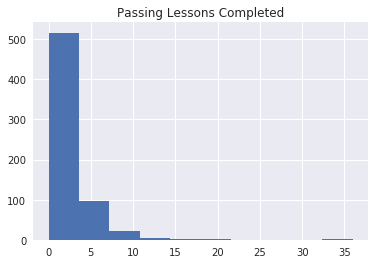

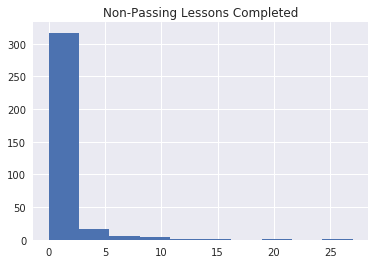

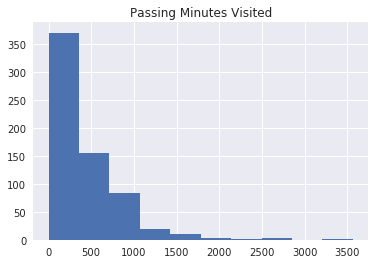

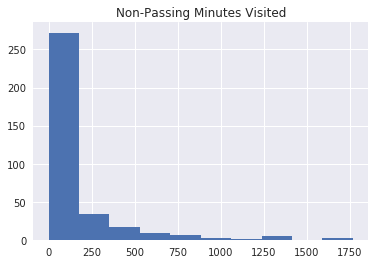

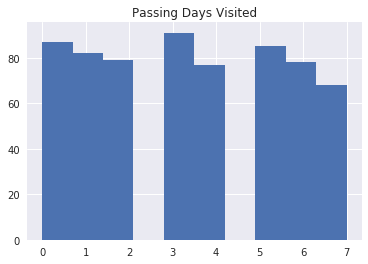

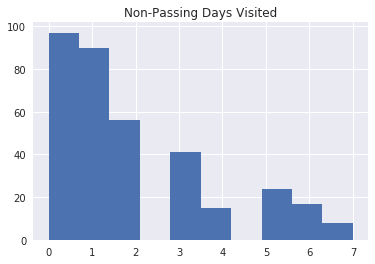

In [103]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
#passed_lessons_completed_summary 
#non_passed_lessons_completed_summary 

#passing_lessons_completed_summary
#non_passing_lessons_completed_summary

#passing_total_minutes_visited_summary 
#non_passing_total_minutes_visited_summary

#passing_days_visited_summary
#non_passing_days_visited_summary


%matplotlib inline
import matplotlib
#import seaborn as sns
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
import matplotlib.pyplot as plt


def plot_histogram(summary_data, title):
    data = summary_data.values()
    plt.hist(data)
    plt.title(title)
    plt.show()
    
plot_histogram(passing_lessons_completed_summary, 'Passing Lessons Completed')
plot_histogram(non_passing_lessons_completed_summary, 'Non-Passing Lessons Completed')

plot_histogram(passing_total_minutes_visited_summary, 'Passing Minutes Visited') 
plot_histogram(non_passing_total_minutes_visited_summary, 'Non-Passing Minutes Visited')

plot_histogram(passing_days_visited_summary, 'Passing Days Visited')
plot_histogram(non_passing_days_visited_summary, 'Non-Passing Days Visited')

## Improving Plots and Sharing Findings

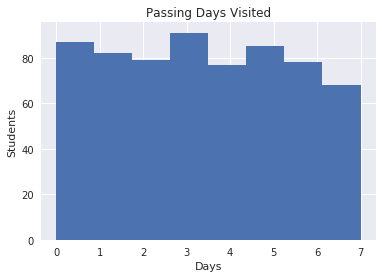

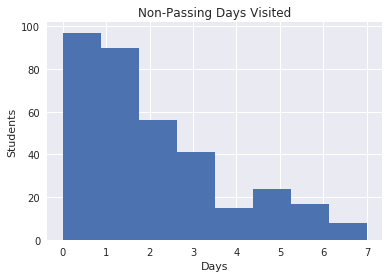

In [105]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.


def plot_histogram(summary_data, title):
    data = summary_data.values()
    plt.hist(data, bins=8)
    plt.xlabel("Days")
    plt.ylabel("Students")
    plt.title(title)
    plt.show()
    
plot_histogram(passing_days_visited_summary, 'Passing Days Visited')
plot_histogram(non_passing_days_visited_summary, 'Non-Passing Days Visited')